In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)

Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

for i in range(4):
  print(labels[i].item())

torch.Size([4, 3, 32, 32])
6
5
5
2


In [6]:
image = images[0]
type(image)

torch.Tensor

In [7]:
npimg = image.numpy()
npimg = np.transpose(npimg, (1, 2, 0))
npimg.shape

(32, 32, 3)

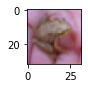

frog


In [8]:
plt.figure(figsize=(1, 1))
plt.imshow(npimg)
plt.show()
print(classes[labels[0]])

In [0]:
def imageshow(img):
  npimg = img.numpy()
  npimg = np.transpose(npimg, (1, 2, 0))
  plt.imshow(npimg)
  plt.show()

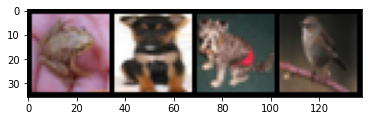

frog          dog          dog          bird


In [10]:
imageshow(torchvision.utils.make_grid(images))
print('          '.join(classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding=1, stride=2)
  
  def forward(self, x):
    x = self.conv1(x)
    return x

In [12]:
net = FirstCNN()
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

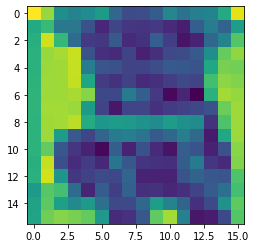

In [13]:
out1 = out[1, 0, :, :].detach().numpy()
plt.imshow(out1)
plt.show()

In [14]:
for params in net.parameters():
  print(params.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [0]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.net = nn.Sequential(
        nn.Conv2d(3, 8, 3),      # (N, 3, 32, 32) -> (N, 8, 30, 30)
        nn.Conv2d(8, 16, 3)     # (N, 8, 30, 30) -> (N, 16, 28, 28)
    )
  
  def forward(self, x):
    x = self.net(x)
    return x

In [16]:
net2 = FirstCNN_v2()
out = net2(images)
out.shape
type(out)

torch.Tensor

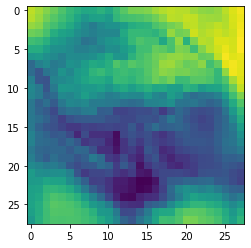

In [17]:
out1 = out[0, 2, :, :].detach().numpy()
plt.imshow(out1)
plt.show()

In [0]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3, self).__init__()
    self.net = nn.Sequential(
      nn.Conv2d(3, 6, 5),   # (N, 3, 32, 32) -> (N, 6, 28, 28)
      nn.AvgPool2d(2, stride=2), # (N, 6, 28, 28) -> (N, 6, 14, 14)
      nn.Conv2d(6, 16, 5),    # (N, 6, 14, 14) -> (N, 16, 10, 10)
      nn.MaxPool2d(2, stride = 2)  # (N, 16, 10, 10) -> (N, 16, 5, 5) 
    )

  def forward(self, x):
    x = self.net(x)
    return x

In [19]:
net3 = FirstCNN_v3()
out3 = net3(images)
out3.shape
type(out3)

torch.Tensor

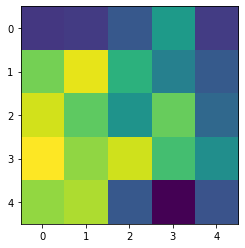

In [20]:
out1 = out3[0, 2, :, :].detach().numpy()
plt.imshow(out1)
plt.show()

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),     # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.Tanh(),
        nn.MaxPool2d(2, stride = 2),      # (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),            # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.Tanh(),
        nn.MaxPool2d(2, stride=2)         # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),    # (N, 400) -> (N, 120)
        nn.Tanh(),
        nn.Linear(120, 84),     # (N, 120) -> (N, 84)
        nn.Tanh(),
        nn.Linear(84, 10)       # (N, 84) -> (N, 10)
        )
    
  def forward(self, x):
      print(x.shape)
      x = self.cnn_model(x)
      print(x.shape)
      x = x.view(x.shape[0], -1)
      print(x.shape)
      x = self.fc_model(x)
      print(x.shape)
      return x


In [78]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [23]:
print(out)

tensor([[-0.1027, -0.1592,  0.0900, -0.1338, -0.0361, -0.1060,  0.0727,  0.0165,
          0.0258,  0.1754],
        [-0.0988, -0.1453,  0.0709, -0.1314, -0.0243, -0.1048,  0.0654,  0.0013,
          0.0240,  0.1510],
        [-0.0936, -0.1350,  0.0942, -0.1294, -0.0380, -0.0899,  0.0720,  0.0296,
          0.0247,  0.1637],
        [-0.0886, -0.1291,  0.0940, -0.1322, -0.0463, -0.0993,  0.0710,  0.0235,
          0.0347,  0.1574]], grad_fn=<AddmmBackward>)


In [24]:
max_value, classes = torch.max(out, axis = 1)
print(classes)

tensor([9, 9, 9, 9])


In [25]:
BS = 128
trainset = torchvision.datasets.CIFAR10(root=':/data', train=True, transform=transforms.ToTensor(), download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BS, shuffle=True)
testset = torchvision.datasets.CIFAR10(root=':/data', train=False, transform=transforms.ToTensor(), download=True)
testloader = torch.utils.data.DataLoader(testset, shuffle=False, batch_size=BS)

Extracting :/data/cifar-10-python.tar.gz to :/data
Files already downloaded and verified


In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),     # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.ReLU(),
        nn.AvgPool2d(2, stride = 2),      # (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),            # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2)         # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),    # (N, 400) -> (N, 120)
        nn.Tanh(),
        nn.Linear(120, 84),     # (N, 120) -> (N, 84)
        nn.Tanh(),
        nn.Linear(84, 10)       # (N, 84) -> (N, 10)
        )
    
  def forward(self, x):
      x = self.cnn_model(x)
      x = x.view(x.shape[0], -1)
      x = self.fc_model(x)
      return x

In [0]:
net = LeNet()

In [0]:
def evaluate(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    output = net(inputs)
    _, pred = torch.max(output.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [29]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

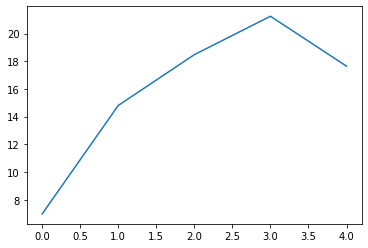

train and test accuracy 10.0 10.0


In [30]:
loss_arr = []
loss_arr_epoch = []
epochs = 5
for epoch in range(epochs):
  for i, data in enumerate(trainloader, 0):

    inputs, labels = data
    
    opt.zero_grad
    output = net(inputs)
    loss = (loss_fn(output, labels))
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())
  loss_arr_epoch.append(loss.item())

plt.plot(loss_arr_epoch)
plt.show()
print('train and test accuracy', evaluate(trainloader), evaluate(testloader))

In [38]:
device = torch.device('cuda:0')
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    output = net(inputs)
    _, pred = torch.max(output, 1)
    total += output.size(0)
    correct += (labels == pred).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

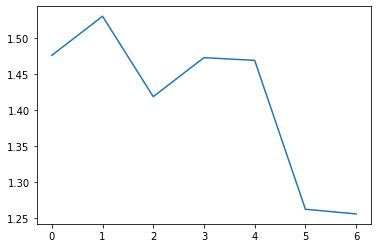

In [113]:
loss_arr = []
epochs = 7
for epoch in range(epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    output = net(inputs)
    opt.zero_grad()
    loss = loss_fn(output, labels)
    loss.backward()
    opt.step()
  loss_arr.append(loss.item())

plt.plot(loss_arr)
plt.show()

In [114]:
print('train and test accuracy', evaluation(trainloader), evaluation(testloader))

train and test accuracy 57.124 55.13


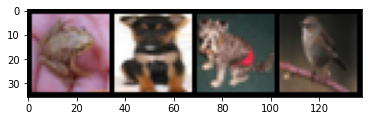

In [55]:
imageshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [82]:
net = LeNet()
out = net(images)
out.shape

torch.Size([4, 10])

In [90]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

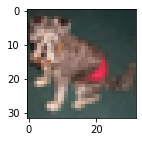

In [68]:
image_id = 2
plt.figure(figsize = (2, 2))
imageshow(images[image_id, ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


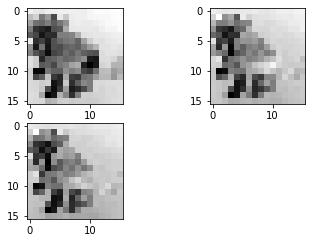

In [88]:
plt.figure(figsize=(6, 6))
plt.subplot(321)
for i in range(3):
  ax1 = plt.subplot(3, 2, i+1)
  plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap = 'binary')
plt.show()